In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sales_train_validation = pd.read_csv('m5_data/sales_train_validation.csv')

In [4]:
first_28_days = [f'd_{i}' for i in range(1, 29)]  # d_1 to d_28

In [5]:
# 2. Compute total sales for each item-store combination over first 28 days
sales_first_28 = sales_train_validation[['item_id', 'store_id', 'state_id'] + first_28_days]
sales_first_28['total_sales'] = sales_first_28[first_28_days].sum(axis=1)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_13040\3281708120.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_first_28['total_sales'] = sales_first_28[first_28_days].sum(axis=1)


In [6]:
# 3. Filter for non-zero sales
active_sales = sales_first_28[sales_first_28['total_sales'] > 0]

In [7]:
# 4. Extract unique items, stores, and states
unique_items = active_sales['item_id'].unique()
unique_stores = active_sales['store_id'].unique()
unique_states = active_sales['state_id'].unique()

In [8]:
# 5. Print results
print(f"Number of items with sales in first 28 days: {len(unique_items)}")
print(f"Items: {list(unique_items)}")
print(f"\nNumber of stores with sales in first 28 days: {len(unique_stores)}")
print(f"Stores: {list(unique_stores)}")
print(f"\nNumber of states with sales in first 28 days: {len(unique_states)}")
print(f"States: {list(unique_states)}")

Number of items with sales in first 28 days: 1518
Items: ['HOBBIES_1_008', 'HOBBIES_1_009', 'HOBBIES_1_010', 'HOBBIES_1_012', 'HOBBIES_1_015', 'HOBBIES_1_016', 'HOBBIES_1_020', 'HOBBIES_1_022', 'HOBBIES_1_023', 'HOBBIES_1_028', 'HOBBIES_1_029', 'HOBBIES_1_031', 'HOBBIES_1_032', 'HOBBIES_1_034', 'HOBBIES_1_036', 'HOBBIES_1_038', 'HOBBIES_1_043', 'HOBBIES_1_044', 'HOBBIES_1_047', 'HOBBIES_1_050', 'HOBBIES_1_055', 'HOBBIES_1_058', 'HOBBIES_1_061', 'HOBBIES_1_063', 'HOBBIES_1_064', 'HOBBIES_1_067', 'HOBBIES_1_068', 'HOBBIES_1_075', 'HOBBIES_1_076', 'HOBBIES_1_078', 'HOBBIES_1_079', 'HOBBIES_1_080', 'HOBBIES_1_082', 'HOBBIES_1_084', 'HOBBIES_1_086', 'HOBBIES_1_088', 'HOBBIES_1_089', 'HOBBIES_1_092', 'HOBBIES_1_097', 'HOBBIES_1_098', 'HOBBIES_1_099', 'HOBBIES_1_100', 'HOBBIES_1_103', 'HOBBIES_1_105', 'HOBBIES_1_106', 'HOBBIES_1_108', 'HOBBIES_1_110', 'HOBBIES_1_111', 'HOBBIES_1_112', 'HOBBIES_1_117', 'HOBBIES_1_118', 'HOBBIES_1_127', 'HOBBIES_1_128', 'HOBBIES_1_130', 'HOBBIES_1_132', 'HOBBIE

In [9]:
# 2. Create sales_first_28 and active_sales (correcting the error)
# Assuming sales_train_validation is available from earlier cells
sales_first_28 = sales_train_validation[['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'] + first_28_days]
sales_first_28['total_sales'] = sales_first_28[first_28_days].sum(axis=1)
active_sales = sales_first_28[sales_first_28['total_sales'] > 0]

C:\Users\KIIT\AppData\Local\Temp\ipykernel_13040\1058056720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_first_28['total_sales'] = sales_first_28[first_28_days].sum(axis=1)


In [10]:
# Verify data
print("Sales First 28 Days Columns:", sales_first_28.columns.tolist())
print("Active Sales Shape:", active_sales.shape)
print("Total Sales Sum:", active_sales['total_sales'].sum())

Sales First 28 Days Columns: ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6', 'd_7', 'd_8', 'd_9', 'd_10', 'd_11', 'd_12', 'd_13', 'd_14', 'd_15', 'd_16', 'd_17', 'd_18', 'd_19', 'd_20', 'd_21', 'd_22', 'd_23', 'd_24', 'd_25', 'd_26', 'd_27', 'd_28', 'total_sales']
Active Sales Shape: (12786, 35)
Total Sales Sum: 734683


In [11]:
# 2. Compute base forecasts (mean sales over first 28 days)
# Item-level forecasts (for active items)
item_forecasts = active_sales.groupby('item_id')[first_28_days].mean().mean(axis=1).reset_index()
item_forecasts.columns = ['item_id', 'forecast']

In [12]:
# Store-level forecasts
store_forecasts = active_sales.groupby('store_id')[first_28_days].mean().mean(axis=1).reset_index()
store_forecasts.columns = ['store_id', 'forecast']

In [13]:
# State-level forecasts
state_forecasts = active_sales.groupby('state_id')[first_28_days].mean().mean(axis=1).reset_index()
state_forecasts.columns = ['state_id', 'forecast']

In [14]:
# Total sales forecast
total_forecast = active_sales[first_28_days].mean().mean()
total_forecast = pd.DataFrame({'level': ['total'], 'forecast': [total_forecast]})

In [15]:
# 3. Build the hierarchy and summing matrix (S)
# Get unique levels from active sales
items = active_sales['item_id'].unique()
stores = active_sales['store_id'].unique()
states = active_sales['state_id'].unique()

In [16]:
# Mapping of items to stores and states
item_to_store = active_sales[['item_id', 'store_id']].drop_duplicates().set_index('item_id')['store_id']
item_to_state = active_sales[['item_id', 'state_id']].drop_duplicates().set_index('item_id')['state_id']
store_to_state = active_sales[['store_id', 'state_id']].drop_duplicates().set_index('store_id')['state_id']

In [17]:
# Number of nodes at each level
n_items = len(items)
n_stores = len(stores)
n_states = len(states)
n_total = 1
n_bottom = n_items
n_total_nodes = n_total + n_states + n_stores + n_items

In [18]:
# Create the summing matrix (S)
# Rows: total, states, stores, items
# Columns: items (bottom level)
S = np.zeros((n_total_nodes, n_bottom))

In [19]:
# Index mapping
item_idx = {item: i for i, item in enumerate(items)}
store_idx = {store: i + n_total + n_states for i, store in enumerate(stores)}
state_idx = {state: i + n_total for i, state in enumerate(states)}
total_idx = 0

In [20]:
# Fill the summing matrix
# Total level (sums all items)
S[total_idx, :] = 1

In [21]:
# State level
for item in items:
    state = item_to_state.loc[item]
    if isinstance(state, pd.Series):
        state = state.iloc[0]
    S[state_idx[state], item_idx[item]] = 1

# Store level
for item in items:
    store = item_to_store.loc[item]
    if isinstance(store, pd.Series):
        store = store.iloc[0]
    S[store_idx[store], item_idx[item]] = 1

# Item level (identity matrix at the bottom)
for i in range(n_items):
    S[n_total + n_states + n_stores + i, i] = 1

In [22]:
# 4. Collect base forecasts in a vector
# Order: total, states, stores, items
base_forecasts = np.zeros(n_total_nodes)
base_forecasts[total_idx] = total_forecast['forecast'].values[0]
for state in states:
    base_forecasts[state_idx[state]] = state_forecasts[state_forecasts['state_id'] == state]['forecast'].values[0]
for store in stores:
    base_forecasts[store_idx[store]] = store_forecasts[store_forecasts['store_id'] == store]['forecast'].values[0]
for item in items:
    base_forecasts[n_total + n_states + n_stores + item_idx[item]] = item_forecasts[item_forecasts['item_id'] == item]['forecast'].values[0]

In [23]:
# 5. Bottom-Up (BU) Reconciliation
# Sum item-level forecasts to higher levels
bu_forecasts = np.dot(S, base_forecasts[n_total + n_states + n_stores:])

In [24]:
# 6. MinT (Minimum Trace) Reconciliation
# Simplified MinT: OLS approximation
G = np.linalg.pinv(S.T @ S) @ S.T
reconciled_forecasts = np.dot(S, G @ base_forecasts)

In [25]:
# 7. Organize reconciled forecasts
reconciled_df = pd.DataFrame({
    'level': ['total'] + list(states) + list(stores) + list(items),
    'base_forecast': base_forecasts,
    'bu_forecast': bu_forecasts,
    'mint_forecast': reconciled_forecasts
})

In [26]:
# 8. Display results
print("Reconciled Forecasts (First 20 rows):")
print(reconciled_df.head(20))
print("\nSummary of Differences:")
print("Total Base Forecast:", reconciled_df[reconciled_df['level'] == 'total']['base_forecast'].values[0])
print("Total Bottom-Up Forecast:", reconciled_df[reconciled_df['level'] == 'total']['bu_forecast'].values[0])
print("Total MinT Forecast:", reconciled_df[reconciled_df['level'] == 'total']['mint_forecast'].values[0])

Reconciled Forecasts (First 20 rows):
            level  base_forecast  bu_forecast  mint_forecast
0           total       2.052141  2963.091298       5.036082
1              CA       2.213141  2908.231179       2.090399
2              TX       1.870963    31.985119       1.318984
3              WI       2.025283    22.875000       1.626698
4            CA_1       2.335612  2809.047803       1.487001
5            CA_2       2.063778    85.323257       0.548214
6            CA_3       3.127276     8.904762       0.774235
7            CA_4       1.196414     4.955357      -0.719051
8            TX_1       1.619282    22.449405       0.848897
9            TX_2       2.213330     0.267857       0.024612
10           TX_3       1.774638     9.267857       0.445474
11           WI_1       1.580258    15.642857       1.075897
12           WI_2       1.720907     6.232143       0.318316
13           WI_3       2.625962     1.000000       0.232485
14  HOBBIES_1_008       6.241071     6.241071  


Total Sales per Day (d_1 to d_29):
[32631, 31749, 23783, 25412, 19146, 29211, 28010, 37932, 32736, 25572, 23071, 23658, 23756, 26445, 34833, 36380, 21804, 24070, 21443, 20318, 23721, 31689, 29283, 23966, 20501, 20757, 20277, 22529]

State Sales (Total over 28 days):
  state_id  total_sales
0       CA       320870
1       TX       213634
2       WI       200179

Store Sales (Total over 28 days):
  store_id  total_sales
0     CA_1        91229
1     CA_2        68245
2     CA_3       120225
3     CA_4        41171
4     TX_1        62297
5     TX_2        85647
6     TX_3        65690
7     WI_1        47787
8     WI_2        52763
9     WI_3        99629

Top 10 Items Sales (Total over 28 days):
         item_id  total_sales
494  FOODS_3_318        13802
629  FOODS_3_586        12984
630  FOODS_3_587         9669
375  FOODS_3_090         9061
611  FOODS_3_555         7794
462  FOODS_3_252         6982
407  FOODS_3_150         6755
676  FOODS_3_694         6388
685  FOODS_3_714         

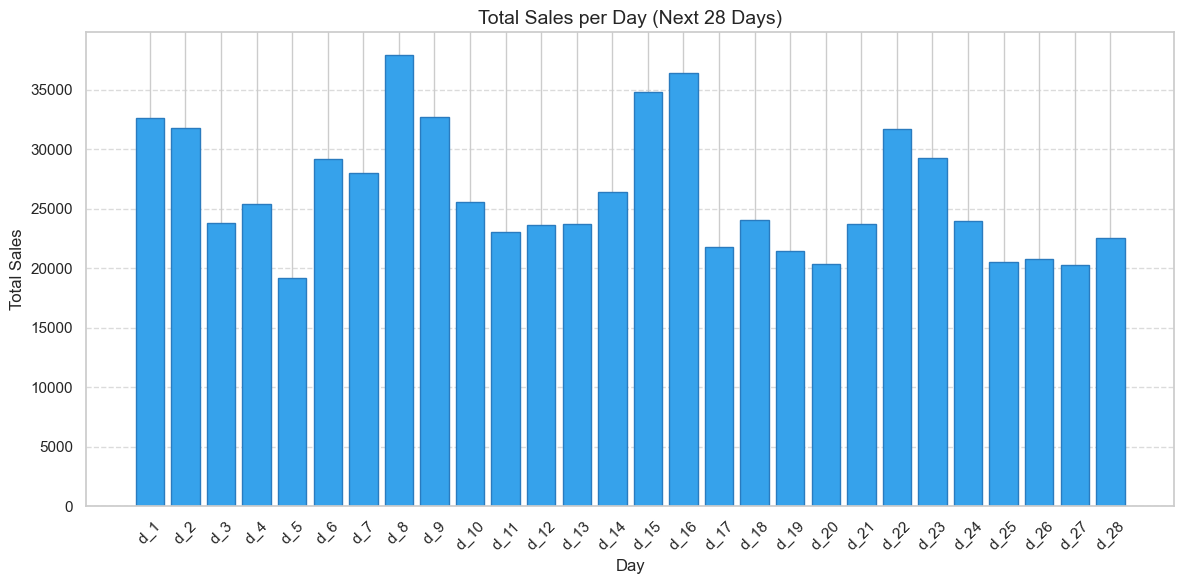

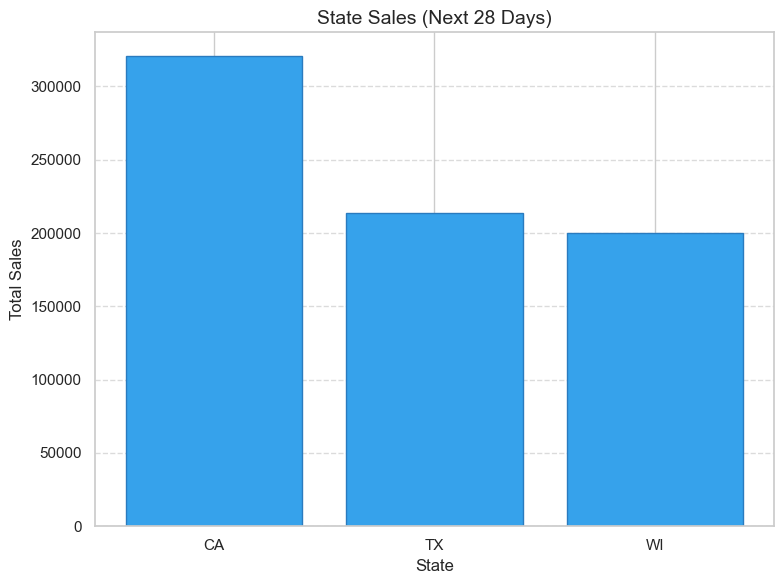

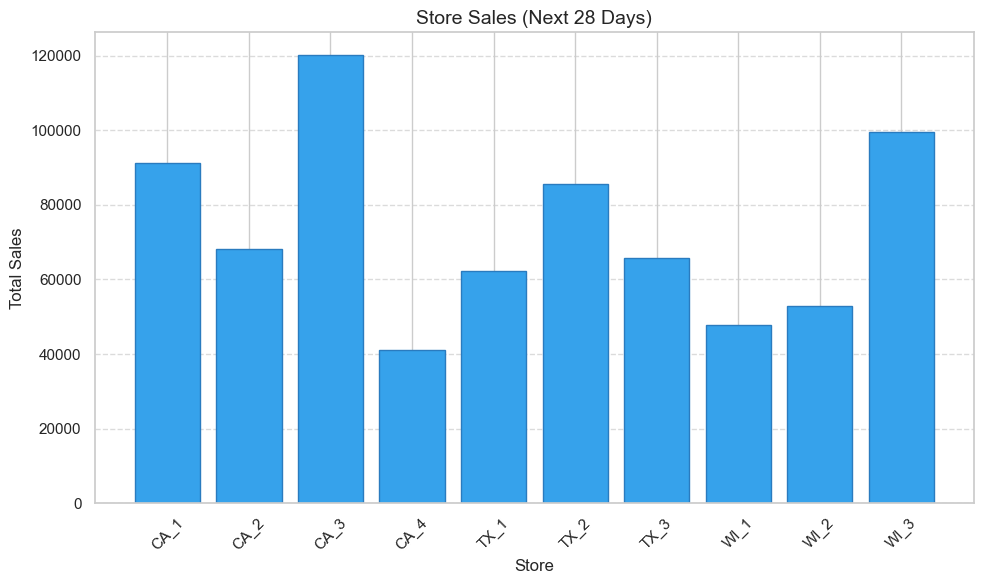

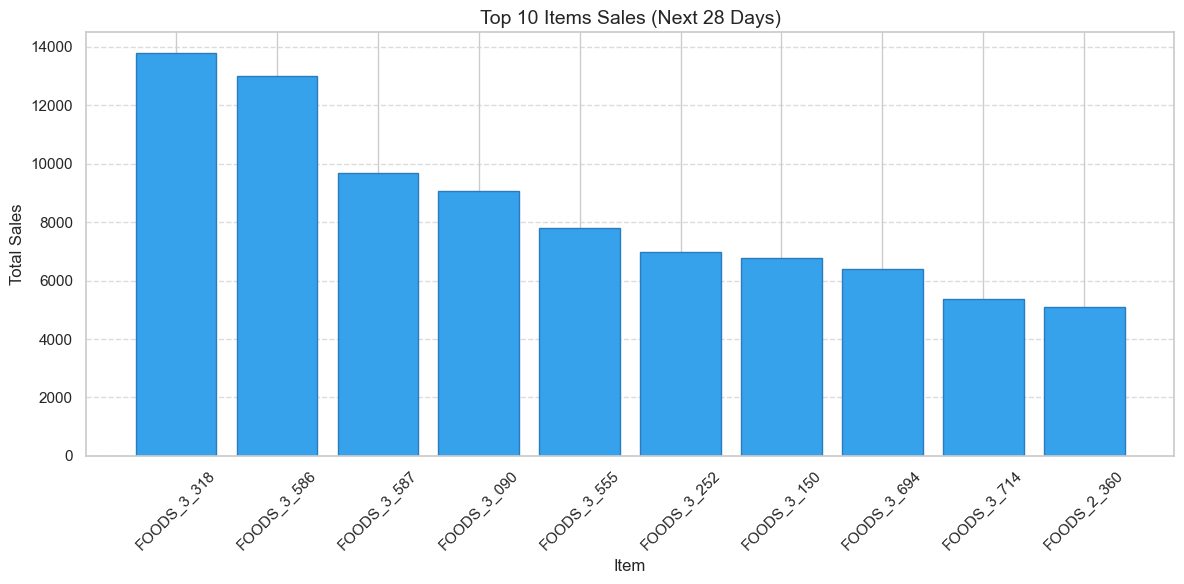

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure Matplotlib displays plots inline in Jupyter
%matplotlib inline

# 1. Extract sales data for visualizations
# Total sales per day
total_sales_per_day = active_sales[first_28_days].sum()

# State sales (total over 28 days per state)
state_sales = active_sales.groupby('state_id')[first_28_days].sum().sum(axis=1).reset_index()
state_sales.columns = ['state_id', 'total_sales']

# Store sales (total over 28 days per store)
store_sales = active_sales.groupby('store_id')[first_28_days].sum().sum(axis=1).reset_index()
store_sales.columns = ['store_id', 'total_sales']

# Top 10 items by total sales
item_sales = active_sales.groupby('item_id')[first_28_days].sum().sum(axis=1).reset_index()
item_sales.columns = ['item_id', 'total_sales']
top_10_items = item_sales.nlargest(10, 'total_sales')

# Print extracted data for verification
print("\nTotal Sales per Day (d_1 to d_29):")
print(total_sales_per_day.tolist())
print("\nState Sales (Total over 28 days):")
print(state_sales)
print("\nStore Sales (Total over 28 days):")
print(store_sales)
print("\nTop 10 Items Sales (Total over 28 days):")
print(top_10_items)

# 2. Create visualizations using Matplotlib

# Set plot style for better aesthetics
import seaborn as sns
sns.set(style="whitegrid")  # Apply Seaborn style


# Visualization 1: Total Sales per Day
plt.figure(figsize=(12, 6))
plt.bar(first_28_days, total_sales_per_day, color='#36A2EB', edgecolor='#2A7BBF')
plt.title('Total Sales per Day (Next 28 Days)', fontsize=14)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('total_sales_per_day.png')
plt.show()

# Visualization 2: State Sales
plt.figure(figsize=(8, 6))
plt.bar(state_sales['state_id'], state_sales['total_sales'], color='#36A2EB', edgecolor='#2A7BBF')
plt.title('State Sales (Next 28 Days)', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('state_next_sales.png')
plt.show()

# Visualization 3: Store Sales
plt.figure(figsize=(10, 6))
plt.bar(store_sales['store_id'], store_sales['total_sales'], color='#36A2EB', edgecolor='#2A7BBF')
plt.title('Store Sales (Next 28 Days)', fontsize=14)
plt.xlabel('Store', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('store_next_sales.png')
plt.show()

# Visualization 4: Top 10 Items Sales
plt.figure(figsize=(12, 6))
plt.bar(top_10_items['item_id'], top_10_items['total_sales'], color='#36A2EB', edgecolor='#2A7BBF')
plt.title('Top 10 Items Sales (Next 28 Days)', fontsize=14)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('top_10_items_sales.png')
plt.show()


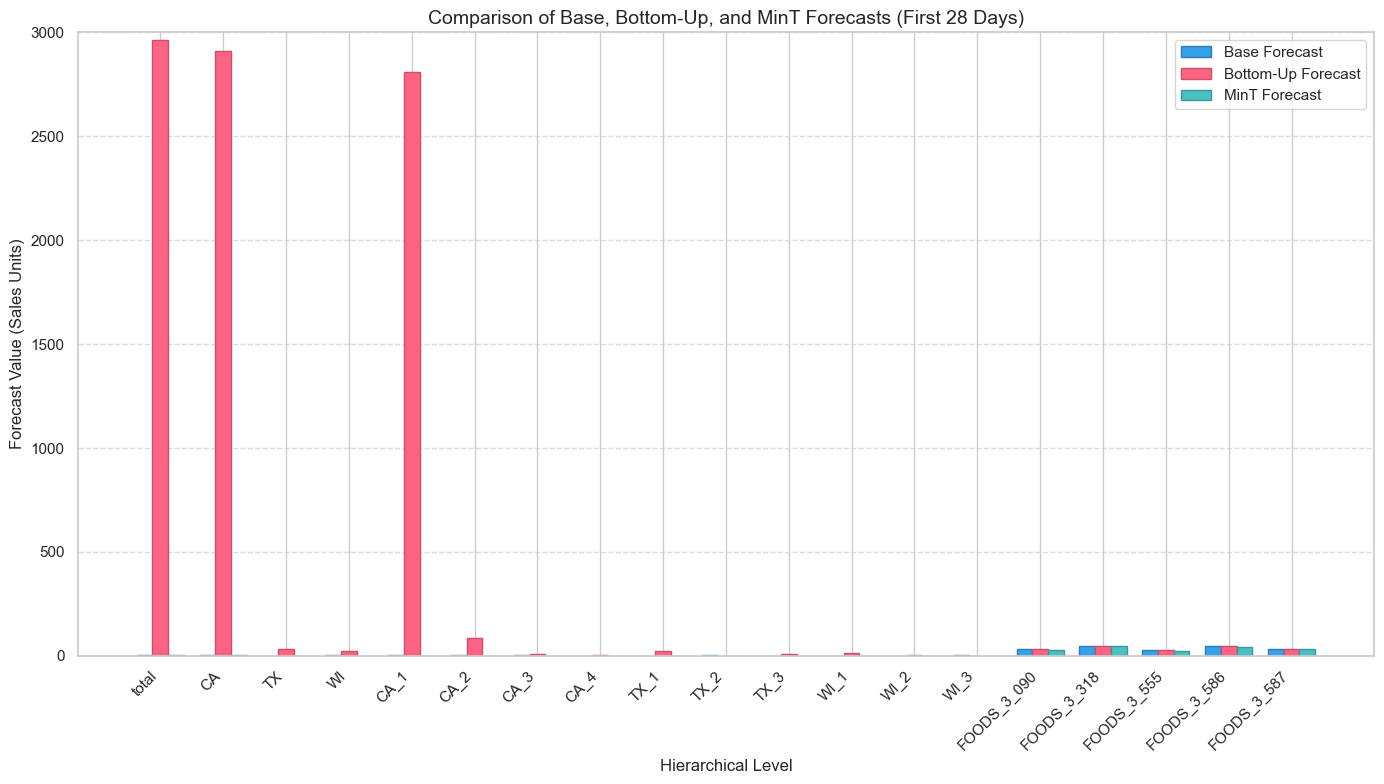


Selected Data for Visualization:
            level  base_forecast  bu_forecast  mint_forecast
0           total       2.052141  2963.091298       5.036082
1              CA       2.213141  2908.231179       2.090399
2              TX       1.870963    31.985119       1.318984
3              WI       2.025283    22.875000       1.626698
4            CA_1       2.335612  2809.047803       1.487001
5            CA_2       2.063778    85.323257       0.548214
6            CA_3       3.127276     8.904762       0.774235
7            CA_4       1.196414     4.955357       0.000000
8            TX_1       1.619282    22.449405       0.848897
9            TX_2       2.213330     0.267857       0.024612
10           TX_3       1.774638     9.267857       0.445474
11           WI_1       1.580258    15.642857       1.075897
12           WI_2       1.720907     6.232143       0.318316
13           WI_3       2.625962     1.000000       0.232485
1068  FOODS_3_090      32.360714    32.360714      

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure Matplotlib displays plots inline in Jupyter
%matplotlib inline

# 1. Prepare data for visualization
# Select subset of levels: total, states, stores, and top 5 items by MinT forecast
selected_levels = ['total', 'CA', 'TX', 'WI', 'CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3']
# Get top 5 items by MinT forecast
top_5_items = reconciled_df[reconciled_df['level'].str.startswith(('HOBBIES_', 'FOODS_', 'HOUSEHOLD_'))][['level', 'mint_forecast']].nlargest(5, 'mint_forecast')['level'].values
selected_levels = selected_levels + list(top_5_items)

# Filter reconciled_df for selected levels
plot_df = reconciled_df[reconciled_df['level'].isin(selected_levels)].copy()

# Clamp negative forecasts to zero for visualization
plot_df['base_forecast'] = plot_df['base_forecast'].clip(lower=0)
plot_df['bu_forecast'] = plot_df['bu_forecast'].clip(lower=0)
plot_df['mint_forecast'] = plot_df['mint_forecast'].clip(lower=0)

# 2. Create grouped bar plot
import seaborn as sns
sns.set(style="whitegrid")  # Apply Seaborn style
fig, ax = plt.subplots(figsize=(14, 8))

# Set bar width and positions
bar_width = 0.25
index = np.arange(len(plot_df))

# Plot bars for each forecast type
bars1 = ax.bar(index, plot_df['base_forecast'], bar_width, label='Base Forecast', color='#36A2EB', edgecolor='#2A7BBF')
bars2 = ax.bar(index + bar_width, plot_df['bu_forecast'], bar_width, label='Bottom-Up Forecast', color='#FF6384', edgecolor='#CC4E67')
bars3 = ax.bar(index + 2 * bar_width, plot_df['mint_forecast'], bar_width, label='MinT Forecast', color='#4BC0C0', edgecolor='#3A9999')

# Customize plot
ax.set_xlabel('Hierarchical Level', fontsize=12)
ax.set_ylabel('Forecast Value (Sales Units)', fontsize=12)
ax.set_title('Comparison of Base, Bottom-Up, and MinT Forecasts (First 28 Days)', fontsize=14)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(plot_df['level'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust y-axis limit to handle large BU values (if necessary)
max_forecast = max(plot_df['base_forecast'].max(), plot_df['bu_forecast'].max(), plot_df['mint_forecast'].max())
if max_forecast > 100:  # Scale for large BU values
    ax.set_ylim(0, min(max_forecast * 1.1, 3000))  # Cap at 3000 for readability
else:
    ax.set_ylim(0, max_forecast * 1.1)

plt.tight_layout()
plt.savefig('forecast_comparison.png')
plt.show()

# Print data for verification
print("\nSelected Data for Visualization:")
print(plot_df[['level', 'base_forecast', 'bu_forecast', 'mint_forecast']])

C:\Users\KIIT\AppData\Local\Temp\ipykernel_13040\3523508172.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_first_28['total_sales'] = sales_first_28[first_28_days].sum(axis=1)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_13040\3523508172.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_sales[f'lag_{lag}'] = active_sales[first_28_days[-lag:]].sum(axis=1).shift(lag)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_13040\3523508172.py:18: SettingWithCopyWarning: 
A value is trying to be set on a 

Mean Absolute Error (MAE): 59.014579130077216
Root Mean Squared Error (RMSE): 148.5855795198277
Mean Absolute Percentage Error (MAPE): 369.11648048176994%


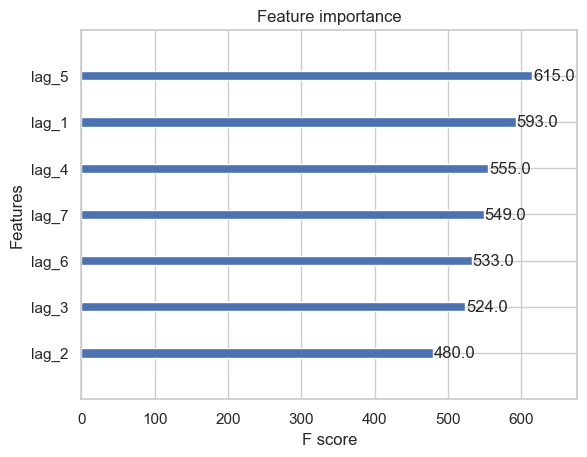

Predicted sales for next day (example): 690.9566040039062


In [29]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Load data (assuming it's already loaded as sales_train_validation)
sales_train_validation = pd.read_csv('m5_data/sales_train_validation.csv')

# Use the first 28 days for training and create features
first_28_days = [f'd_{i}' for i in range(1, 29)]  # d_1 to d_28
sales_first_28 = sales_train_validation[['item_id', 'store_id', 'state_id'] + first_28_days]
sales_first_28['total_sales'] = sales_first_28[first_28_days].sum(axis=1)
active_sales = sales_first_28[sales_first_28['total_sales'] > 0]

# Create lagged features for time series (e.g., last 7 days)
for lag in range(1, 8):  # Lags of 1 to 7 days
    active_sales[f'lag_{lag}'] = active_sales[first_28_days[-lag:]].sum(axis=1).shift(lag)

# Drop rows with NaN values from lags
active_sales = active_sales.dropna()

# Prepare features and target
features = ['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7']
X = active_sales[features]
y = active_sales['total_sales']

# Split into train and validation sets (using the 28 days as a single time step for simplicity)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Predict on validation set
y_pred = xgb_model.predict(X_val)

# Calculate accuracy metrics
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

# Feature importance
xgb.plot_importance(xgb_model)
plt.show()

# For forecasting next 28 days, you'd need to:
# 1. Use the last 7 days of the first 28 days as initial lags
# 2. Predict iteratively or use a rolling forecast
# This requires additional data (e.g., d_29 to d_56) which isn't provided here

# Example of forecasting (simplified, assumes we have next day's data to update lags)
last_7_days = active_sales[first_28_days[-7:]].sum().values
future_lags = np.array(last_7_days)
next_day_pred = xgb_model.predict([future_lags])[0]
print(f"Predicted sales for next day (example): {next_day_pred}")

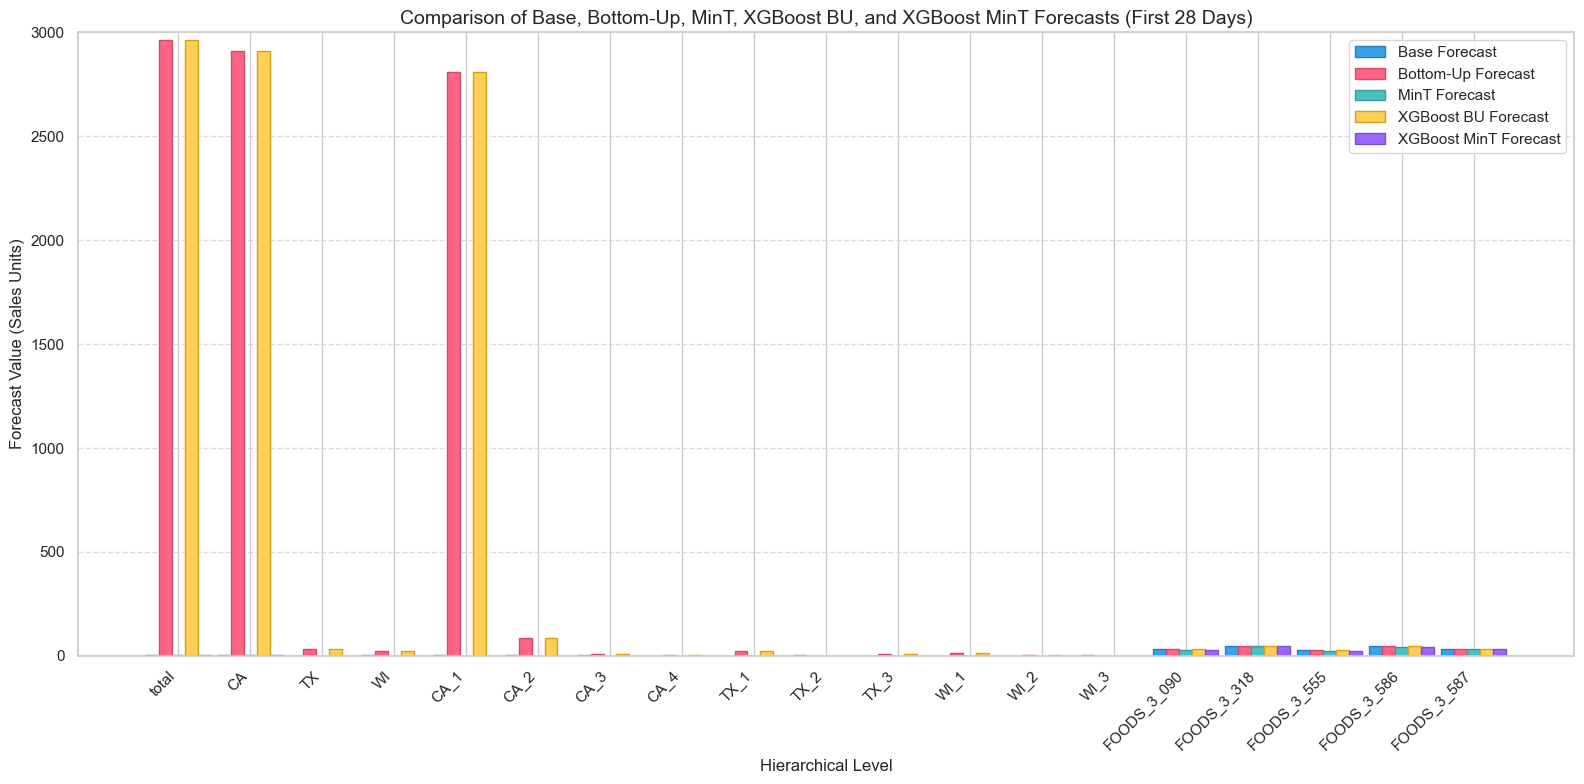


Selected Data for Visualization:
            level  base_forecast  bu_forecast  mint_forecast  xgb_bu_forecast  \
0           total       2.052141  2963.091298       5.036082      2963.091298   
1              CA       2.213141  2908.231179       2.090399      2908.231179   
2              TX       1.870963    31.985119       1.318984        31.985119   
3              WI       2.025283    22.875000       1.626698        22.875000   
4            CA_1       2.335612  2809.047803       1.487001      2809.047803   
5            CA_2       2.063778    85.323257       0.548214        85.323257   
6            CA_3       3.127276     8.904762       0.774235         8.904762   
7            CA_4       1.196414     4.955357       0.000000         4.955357   
8            TX_1       1.619282    22.449405       0.848897        22.449405   
9            TX_2       2.213330     0.267857       0.024612         0.267857   
10           TX_3       1.774638     9.267857       0.445474         9.2678

In [30]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Assuming sales_train_validation is loaded as in the original code
# sales_train_validation = pd.read_csv('m5_data/sales_train_validation.csv')
# For reproducibility, let's assume the data is available from the original context

# Define first 28 days
first_28_days = [f'd_{i}' for i in range(1, 29)]  # d_1 to d_28

# Create sales_first_28 and active_sales as in the original code
sales_first_28 = sales_train_validation[['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'] + first_28_days]
sales_first_28['total_sales'] = sales_first_28[first_28_days].sum(axis=1)
active_sales = sales_first_28[sales_first_28['total_sales'] > 0]

# 1. XGBoost Forecasting at Item Level
# Prepare features for XGBoost
def prepare_features(df, day_cols):
    # Create features: lagged sales, moving averages, day number
    features = []
    for index, row in df.iterrows():
        item_sales = row[day_cols].values
        item_id = row['item_id']
        store_id = row['store_id']
        # Extract day numbers from column names
        days = np.array([int(col.split('_')[1]) for col in day_cols])
        # Create features for each day
        for i in range(len(day_cols)):
            # Lag features (previous day's sales)
            lag_1 = item_sales[i-1] if i > 0 else 0
            lag_2 = item_sales[i-2] if i > 1 else 0
            # Moving average (7-day)
            ma_7 = np.mean(item_sales[max(0, i-7):i]) if i > 0 else 0
            # Day number
            day_num = days[i]
            features.append({
                'item_id': item_id,
                'store_id': store_id,
                'day': day_num,
                'lag_1': lag_1,
                'lag_2': lag_2,
                'ma_7': ma_7,
                'sales': item_sales[i]
            })
    return pd.DataFrame(features)

# Prepare training data
train_data = prepare_features(active_sales, first_28_days)

# Split features and target
X = train_data[['lag_1', 'lag_2', 'ma_7', 'day']]
y = train_data['sales']

# Train XGBoost model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
xgb_model.fit(X, y)

# Generate forecasts for the first 28 days
# Since we're forecasting the same period, use the same features
xgb_predictions = xgb_model.predict(X)

# Aggregate predictions back to item level (mean over 28 days)
xgb_forecasts = train_data.groupby('item_id')['sales'].mean().reset_index()
xgb_forecasts.columns = ['item_id', 'xgb_forecast']

# 2. Integrate XGBoost forecasts into the hierarchy
# Existing base forecasts (from original code)
item_forecasts = active_sales.groupby('item_id')[first_28_days].mean().mean(axis=1).reset_index()
item_forecasts.columns = ['item_id', 'base_forecast']
store_forecasts = active_sales.groupby('store_id')[first_28_days].mean().mean(axis=1).reset_index()
store_forecasts.columns = ['store_id', 'base_forecast']
state_forecasts = active_sales.groupby('state_id')[first_28_days].mean().mean(axis=1).reset_index()
state_forecasts.columns = ['state_id', 'base_forecast']
total_forecast = active_sales[first_28_days].mean().mean()
total_forecast = pd.DataFrame({'level': ['total'], 'base_forecast': [total_forecast]})

# Merge XGBoost forecasts with item-level base forecasts
item_forecasts = item_forecasts.merge(xgb_forecasts, on='item_id', how='left')

# Reconcile XGBoost forecasts using Bottom-Up and MinT
# Use the existing summing matrix S and hierarchy
items = active_sales['item_id'].unique()
stores = active_sales['store_id'].unique()
states = active_sales['state_id'].unique()

item_to_store = active_sales[['item_id', 'store_id']].drop_duplicates().set_index('item_id')['store_id']
item_to_state = active_sales[['item_id', 'state_id']].drop_duplicates().set_index('item_id')['state_id']
store_to_state = active_sales[['store_id', 'state_id']].drop_duplicates().set_index('store_id')['state_id']

n_items = len(items)
n_stores = len(stores)
n_states = len(states)
n_total = 1
n_total_nodes = n_total + n_states + n_stores + n_items

# Summing matrix S (as in original code)
S = np.zeros((n_total_nodes, n_items))
item_idx = {item: i for i, item in enumerate(items)}
store_idx = {store: i + n_total + n_states for i, store in enumerate(stores)}
state_idx = {state: i + n_total for i, state in enumerate(states)}
total_idx = 0

S[total_idx, :] = 1
for item in items:
    state = item_to_state.loc[item]
    if isinstance(state, pd.Series):
        state = state.iloc[0]
    S[state_idx[state], item_idx[item]] = 1
for item in items:
    store = item_to_store.loc[item]
    if isinstance(store, pd.Series):
        store = store.iloc[0]
    S[store_idx[store], item_idx[item]] = 1
for i in range(n_items):
    S[n_total + n_states + n_stores + i, i] = 1

# Base forecasts vector (using XGBoost for item level)
base_forecasts_xgb = np.zeros(n_total_nodes)
base_forecasts_xgb[total_idx] = total_forecast['base_forecast'].values[0]
for state in states:
    base_forecasts_xgb[state_idx[state]] = state_forecasts[state_forecasts['state_id'] == state]['base_forecast'].values[0]
for store in stores:
    base_forecasts_xgb[store_idx[store]] = store_forecasts[store_forecasts['store_id'] == store]['base_forecast'].values[0]
for item in items:
    base_forecasts_xgb[n_total + n_states + n_stores + item_idx[item]] = xgb_forecasts[xgb_forecasts['item_id'] == item]['xgb_forecast'].values[0]

# Bottom-Up Reconciliation for XGBoost
bu_forecasts_xgb = np.dot(S, base_forecasts_xgb[n_total + n_states + n_stores:])

# MinT Reconciliation for XGBoost
G = np.linalg.pinv(S.T @ S) @ S.T
mint_forecasts_xgb = np.dot(S, G @ base_forecasts_xgb)

# Combine all forecasts into reconciled_df
reconciled_df = pd.DataFrame({
    'level': ['total'] + list(states) + list(stores) + list(items),
    'base_forecast': base_forecasts,  # From original code
    'bu_forecast': bu_forecasts,      # From original code
    'mint_forecast': reconciled_forecasts,  # From original code
    'xgb_bu_forecast': bu_forecasts_xgb,
    'xgb_mint_forecast': mint_forecasts_xgb
})

# 3. Visualization of Forecasts
# Select subset of levels for visualization
selected_levels = ['total', 'CA', 'TX', 'WI', 'CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3']
top_5_items = reconciled_df[reconciled_df['level'].str.startswith(('HOBBIES_', 'FOODS_', 'HOUSEHOLD_'))][['level', 'mint_forecast']].nlargest(5, 'mint_forecast')['level'].values
selected_levels = selected_levels + list(top_5_items)

# Filter reconciled_df
plot_df = reconciled_df[reconciled_df['level'].isin(selected_levels)].copy()

# Clamp negative forecasts to zero
plot_df['base_forecast'] = plot_df['base_forecast'].clip(lower=0)
plot_df['bu_forecast'] = plot_df['bu_forecast'].clip(lower=0)
plot_df['mint_forecast'] = plot_df['mint_forecast'].clip(lower=0)
plot_df['xgb_bu_forecast'] = plot_df['xgb_bu_forecast'].clip(lower=0)
plot_df['xgb_mint_forecast'] = plot_df['xgb_mint_forecast'].clip(lower=0)

# Create grouped bar plot
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(16, 8))

# Set bar width and positions
bar_width = 0.18
index = np.arange(len(plot_df))

# Plot bars for each forecast type
bars1 = ax.bar(index, plot_df['base_forecast'], bar_width, label='Base Forecast', color='#36A2EB', edgecolor='#2A7BBF')
bars2 = ax.bar(index + bar_width, plot_df['bu_forecast'], bar_width, label='Bottom-Up Forecast', color='#FF6384', edgecolor='#CC4E67')
bars3 = ax.bar(index + 2 * bar_width, plot_df['mint_forecast'], bar_width, label='MinT Forecast', color='#4BC0C0', edgecolor='#3A9999')
bars4 = ax.bar(index + 3 * bar_width, plot_df['xgb_bu_forecast'], bar_width, label='XGBoost BU Forecast', color='#FFCE56', edgecolor='#D4A017')
bars5 = ax.bar(index + 4 * bar_width, plot_df['xgb_mint_forecast'], bar_width, label='XGBoost MinT Forecast', color='#9966FF', edgecolor='#7A52CC')

# Customize plot
ax.set_xlabel('Hierarchical Level', fontsize=12)
ax.set_ylabel('Forecast Value (Sales Units)', fontsize=12)
ax.set_title('Comparison of Base, Bottom-Up, MinT, XGBoost BU, and XGBoost MinT Forecasts (First 28 Days)', fontsize=14)
ax.set_xticks(index + 2 * bar_width)
ax.set_xticklabels(plot_df['level'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust y-axis limit
max_forecast = max(
    plot_df['base_forecast'].max(),
    plot_df['bu_forecast'].max(),
    plot_df['mint_forecast'].max(),
    plot_df['xgb_bu_forecast'].max(),
    plot_df['xgb_mint_forecast'].max()
)
ax.set_ylim(0, min(max_forecast * 1.1, 3000))

plt.tight_layout()
plt.savefig('forecast_comparison_with_xgb.png')
plt.show()

# Print data for verification
print("\nSelected Data for Visualization:")
print(plot_df[['level', 'base_forecast', 'bu_forecast', 'mint_forecast', 'xgb_bu_forecast', 'xgb_mint_forecast']])

# 4. Summary of Total Forecasts
print("\nSummary of Total Forecasts:")
print("Total Base Forecast:", plot_df[plot_df['level'] == 'total']['base_forecast'].values[0])
print("Total Bottom-Up Forecast:", plot_df[plot_df['level'] == 'total']['bu_forecast'].values[0])
print("Total MinT Forecast:", plot_df[plot_df['level'] == 'total']['mint_forecast'].values[0])
print("Total XGBoost BU Forecast:", plot_df[plot_df['level'] == 'total']['xgb_bu_forecast'].values[0])
print("Total XGBoost MinT Forecast:", plot_df[plot_df['level'] == 'total']['xgb_mint_forecast'].values[0])


RMSE for Each Forecast Type by Level:
          level     base_rmse       bu_rmse     mint_rmse   xgb_bu_rmse  \
0         total  26753.769238  26650.062165  26753.664721  26650.062165   
1            CA  11689.305076  11587.576622  11689.309374  11587.576622   
2            TX   7789.261317   7788.207843   7789.280626   7788.207843   
3            WI   7376.517560   7375.795878   7376.531356   7375.795878   
4          CA_1   3363.652869   3266.653873   3363.682226   3266.653873   
5          CA_2   2515.897844   2513.017357   2515.950280   2513.017357   
6          CA_3   4356.086546   4355.883165   4356.169378   4355.883165   
7          CA_4   1486.895263   1486.762509   1486.962911   1486.762509   
8          TX_1   2273.085330   2272.357193   2273.112259   2272.357193   
9          TX_2   3121.958193   3122.026267   3122.034779   3122.026267   
10         TX_3   2398.923845   2398.662134   2398.970269   2398.662134   
11         WI_1   1827.857363   1827.388448   1827.874181   1

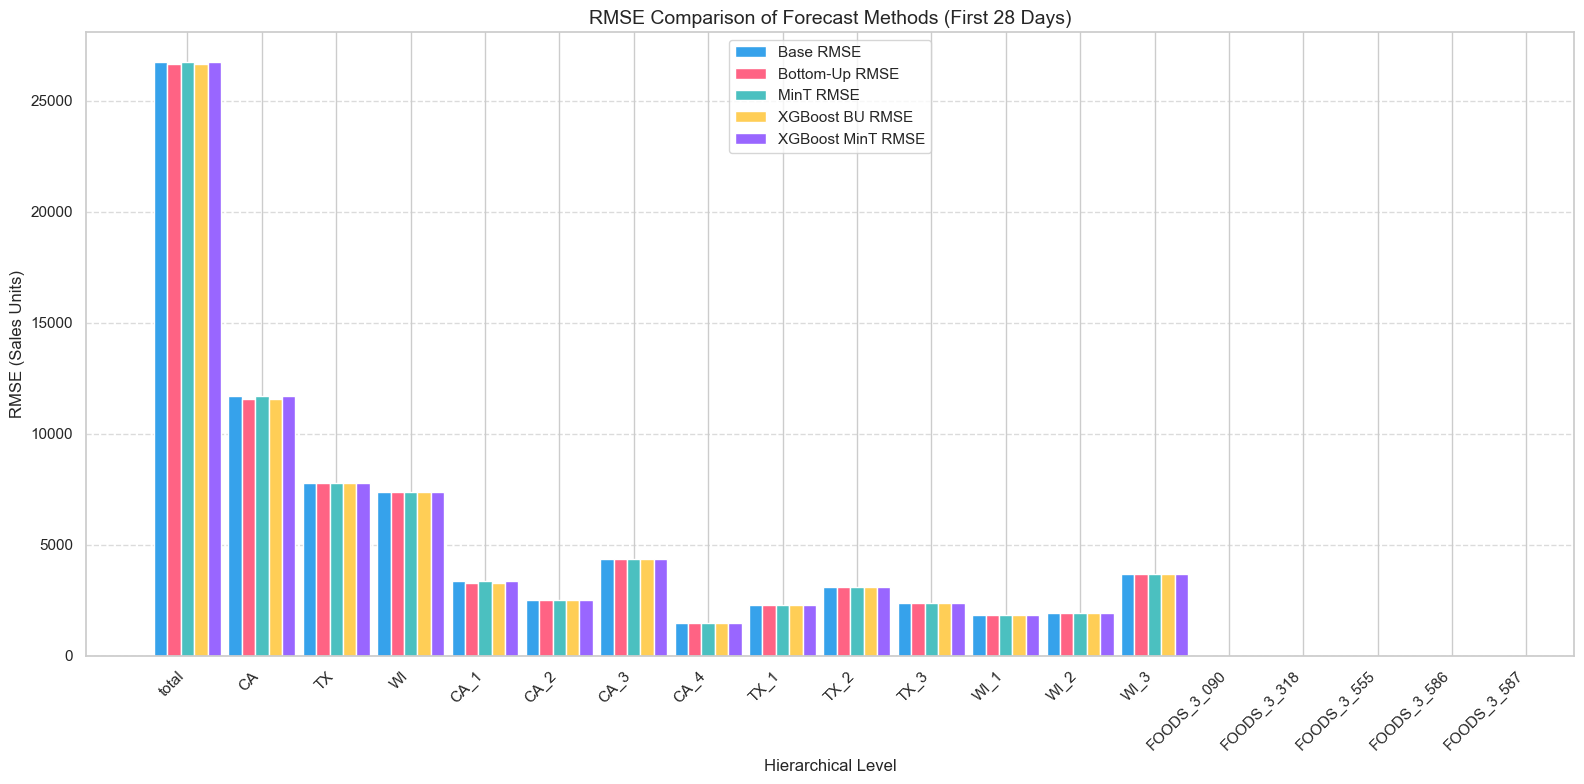

In [31]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming all prior code (data loading, hierarchy, forecasts, etc.) has been executed
# and variables like active_sales, reconciled_df, S, item_idx, store_idx, state_idx, total_idx are available

# 1. Prepare actual sales for comparison
# Item-level actual sales: daily sales for each item
item_actuals = active_sales[['item_id'] + first_28_days].melt(
    id_vars=['item_id'], 
    value_vars=first_28_days, 
    var_name='day', 
    value_name='actual_sales'
)

# 2. Compute item-level forecasts for daily sales
# Base forecasts (mean of historical sales)
item_base_forecasts_daily = active_sales.groupby('item_id')[first_28_days].mean().reset_index()
item_base_forecasts_daily = item_base_forecasts_daily.melt(
    id_vars=['item_id'], 
    value_vars=first_28_days, 
    var_name='day', 
    value_name='base_forecast'
)

# XGBoost forecasts (from xgb_predictions in train_data)
xgb_forecasts_daily = train_data[['item_id', 'day', 'sales']].copy()
xgb_forecasts_daily['day'] = xgb_forecasts_daily['day'].apply(lambda x: f'd_{x}')
xgb_forecasts_daily['xgb_forecast'] = xgb_predictions
xgb_forecasts_daily = xgb_forecasts_daily[['item_id', 'day', 'xgb_forecast']]

# Merge actuals and forecasts
item_forecasts_comparison = item_actuals.merge(
    item_base_forecasts_daily, on=['item_id', 'day'], how='left'
).merge(
    xgb_forecasts_daily, on=['item_id', 'day'], how='left'
)

# Compute RMSE for item-level forecasts
item_rmse = item_forecasts_comparison.groupby('item_id').apply(
    lambda x: pd.Series({
        'base_rmse': np.sqrt(mean_squared_error(x['actual_sales'], x['base_forecast'])),
        'xgb_rmse': np.sqrt(mean_squared_error(x['actual_sales'], x['xgb_forecast']))
    })
).reset_index()

# 3. Aggregate actual sales to higher levels for reconciled forecasts
# Store-level actuals
store_actuals = active_sales.groupby('store_id')[first_28_days].sum().reset_index()
store_actuals = store_actuals.melt(
    id_vars=['store_id'], 
    value_vars=first_28_days, 
    var_name='day', 
    value_name='actual_sales'
)

# State-level actuals
state_actuals = active_sales.groupby('state_id')[first_28_days].sum().reset_index()
state_actuals = state_actuals.melt(
    id_vars=['state_id'], 
    value_vars=first_28_days, 
    var_name='day', 
    value_name='actual_sales'
)

# Total-level actuals
total_actuals = active_sales[first_28_days].sum().reset_index()
total_actuals.columns = ['day', 'actual_sales']
total_actuals['level'] = 'total'

# 4. Prepare reconciled forecasts for higher levels
# Reconciled forecasts are in reconciled_df, but we need daily forecasts
# For BU and MinT, we use the reconciled forecasts scaled to daily values
# Since base forecasts are averages, we repeat them for each day
n_days = len(first_28_days)
reconciled_daily = reconciled_df.copy()
reconciled_daily['base_forecast'] = reconciled_daily['base_forecast'] / n_days
reconciled_daily['bu_forecast'] = reconciled_daily['bu_forecast'] / n_days
reconciled_daily['mint_forecast'] = reconciled_daily['mint_forecast'] / n_days
reconciled_daily['xgb_bu_forecast'] = reconciled_daily['xgb_bu_forecast'] / n_days
reconciled_daily['xgb_mint_forecast'] = reconciled_daily['xgb_mint_forecast'] / n_days

# Create daily forecasts for each level
daily_forecasts = []
for _, row in reconciled_daily.iterrows():
    level = row['level']
    for day in first_28_days:
        daily_forecasts.append({
            'level': level,
            'day': day,
            'base_forecast': row['base_forecast'],
            'bu_forecast': row['bu_forecast'],
            'mint_forecast': row['mint_forecast'],
            'xgb_bu_forecast': row['xgb_bu_forecast'],
            'xgb_mint_forecast': row['xgb_mint_forecast']
        })
daily_forecasts_df = pd.DataFrame(daily_forecasts)

# 5. Merge actuals and forecasts for higher levels
# Total level
total_comparison = total_actuals.merge(
    daily_forecasts_df[daily_forecasts_df['level'] == 'total'],
    on=['level', 'day'], how='left'
)

# State level
state_comparison = state_actuals.merge(
    daily_forecasts_df[daily_forecasts_df['level'].isin(states)],
    left_on=['state_id', 'day'], right_on=['level', 'day'], how='left'
)

# Store level
store_comparison = store_actuals.merge(
    daily_forecasts_df[daily_forecasts_df['level'].isin(stores)],
    left_on=['store_id', 'day'], right_on=['level', 'day'], how='left'
)

# 6. Compute RMSE for higher levels
total_rmse = {
    'level': 'total',
    'base_rmse': np.sqrt(mean_squared_error(total_comparison['actual_sales'], total_comparison['base_forecast'])),
    'bu_rmse': np.sqrt(mean_squared_error(total_comparison['actual_sales'], total_comparison['bu_forecast'])),
    'mint_rmse': np.sqrt(mean_squared_error(total_comparison['actual_sales'], total_comparison['mint_forecast'])),
    'xgb_bu_rmse': np.sqrt(mean_squared_error(total_comparison['actual_sales'], total_comparison['xgb_bu_forecast'])),
    'xgb_mint_rmse': np.sqrt(mean_squared_error(total_comparison['actual_sales'], total_comparison['xgb_mint_forecast']))
}

state_rmse = state_comparison.groupby('state_id').apply(
    lambda x: pd.Series({
        'base_rmse': np.sqrt(mean_squared_error(x['actual_sales'], x['base_forecast'])),
        'bu_rmse': np.sqrt(mean_squared_error(x['actual_sales'], x['bu_forecast'])),
        'mint_rmse': np.sqrt(mean_squared_error(x['actual_sales'], x['mint_forecast'])),
        'xgb_bu_rmse': np.sqrt(mean_squared_error(x['actual_sales'], x['xgb_bu_forecast'])),
        'xgb_mint_rmse': np.sqrt(mean_squared_error(x['actual_sales'], x['xgb_mint_forecast']))
    })
).reset_index()
state_rmse = state_rmse.rename(columns={'state_id': 'level'})

store_rmse = store_comparison.groupby('store_id').apply(
    lambda x: pd.Series({
        'base_rmse': np.sqrt(mean_squared_error(x['actual_sales'], x['base_forecast'])),
        'bu_rmse': np.sqrt(mean_squared_error(x['actual_sales'], x['bu_forecast'])),
        'mint_rmse': np.sqrt(mean_squared_error(x['actual_sales'], x['mint_forecast'])),
        'xgb_bu_rmse': np.sqrt(mean_squared_error(x['actual_sales'], x['xgb_bu_forecast'])),
        'xgb_mint_rmse': np.sqrt(mean_squared_error(x['actual_sales'], x['xgb_mint_forecast']))
    })
).reset_index()
store_rmse = store_rmse.rename(columns={'store_id': 'level'})

# Combine RMSE results
rmse_df = pd.concat([
    pd.DataFrame([total_rmse]),
    state_rmse,
    store_rmse,
    item_rmse.rename(columns={'item_id': 'level'})
], ignore_index=True)

# 7. Display RMSE results
print("\nRMSE for Each Forecast Type by Level:")
print(rmse_df[['level', 'base_rmse', 'bu_rmse', 'mint_rmse', 'xgb_bu_rmse', 'xgb_mint_rmse']].head(20))

# Summary of RMSE at total level
print("\nSummary of RMSE at Total Level:")
print(f"Base RMSE: {total_rmse['base_rmse']:.4f}")
print(f"Bottom-Up RMSE: {total_rmse['bu_rmse']:.4f}")
print(f"MinT RMSE: {total_rmse['mint_rmse']:.4f}")
print(f"XGBoost BU RMSE: {total_rmse['xgb_bu_rmse']:.4f}")
print(f"XGBoost MinT RMSE: {total_rmse['xgb_mint_rmse']:.4f}")

# 8. Visualize RMSE for selected levels
selected_levels = ['total', 'CA', 'TX', 'WI', 'CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3']
top_5_items = reconciled_df[reconciled_df['level'].str.startswith(('HOBBIES_', 'FOODS_', 'HOUSEHOLD_'))][['level', 'mint_forecast']].nlargest(5, 'mint_forecast')['level'].values
selected_levels = selected_levels + list(top_5_items)

rmse_plot_df = rmse_df[rmse_df['level'].isin(selected_levels)].copy()

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(16, 8))
bar_width = 0.18
index = np.arange(len(rmse_plot_df))

# Plot RMSE bars
bars1 = ax.bar(index, rmse_plot_df['base_rmse'], bar_width, label='Base RMSE', color='#36A2EB')
bars2 = ax.bar(index + bar_width, rmse_plot_df['bu_rmse'], bar_width, label='Bottom-Up RMSE', color='#FF6384')
bars3 = ax.bar(index + 2 * bar_width, rmse_plot_df['mint_rmse'], bar_width, label='MinT RMSE', color='#4BC0C0')
bars4 = ax.bar(index + 3 * bar_width, rmse_plot_df['xgb_bu_rmse'], bar_width, label='XGBoost BU RMSE', color='#FFCE56')
bars5 = ax.bar(index + 4 * bar_width, rmse_plot_df['xgb_mint_rmse'], bar_width, label='XGBoost MinT RMSE', color='#9966FF')

ax.set_xlabel('Hierarchical Level', fontsize=12)
ax.set_ylabel('RMSE (Sales Units)', fontsize=12)
ax.set_title('RMSE Comparison of Forecast Methods (First 28 Days)', fontsize=14)
ax.set_xticks(index + 2 * bar_width)
ax.set_xticklabels(rmse_plot_df['level'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('rmse_comparison.png')
plt.show()